In [1]:
#Random Forest Regression

#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

#Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score


In [2]:
#importing the dataset
dataset = pd.read_csv("Dataset.csv")

In [3]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, 6:7].values

In [4]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
dataset['Date']= le.fit_transform(dataset['Date'])

             CodedDay      Zone   Weather  Temperature   Traffic
CodedDay     1.000000 -0.000691  0.006712     0.004322 -0.025281
Zone        -0.000691  1.000000  0.026704    -0.015531 -0.004137
Weather      0.006712  0.026704  1.000000    -0.008671 -0.018666
Temperature  0.004322 -0.015531 -0.008671     1.000000 -0.022538
Traffic     -0.025281 -0.004137 -0.018666    -0.022538  1.000000


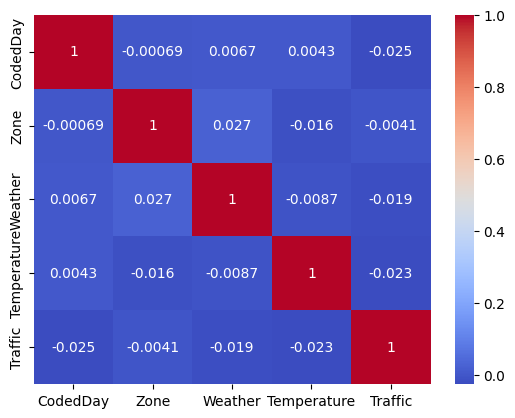

In [5]:
# Compute Correlation
corr = dataset.iloc[:, 2:].corr()
print(corr)

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

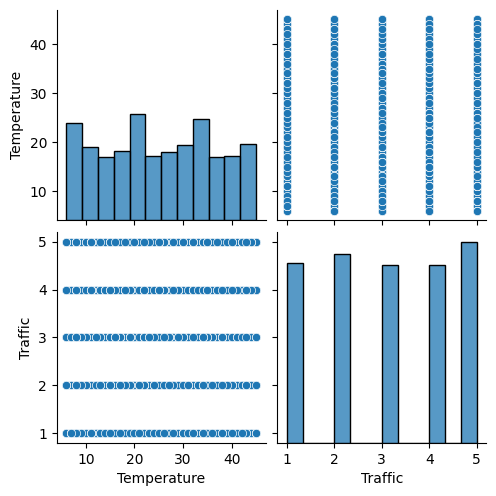

In [6]:
sns.pairplot(dataset[['Temperature', 'Traffic']])
plt.show()

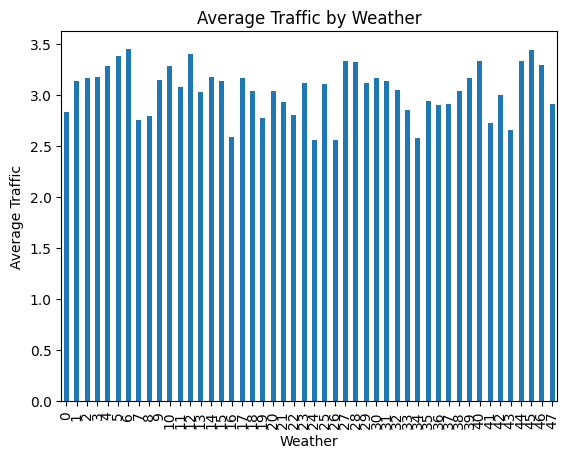

In [7]:
dataset.groupby('Weather')['Traffic'].mean().plot(kind='bar')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Weather')
plt.show()

In [8]:
#splitting into Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.fit_transform(X_test)

In [10]:
#Fitting Random Forest Regression to the dataset
model = RandomForestRegressor(n_estimators = 100, random_state=0)
model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=0)

In [11]:
#Predicting the test set results
y_pred = model.predict(X_test)

In [12]:
if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
    
else:
    y_pred=np.round(y_pred+0.5)

#Calculationg the error and accuracy

df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error = ",df1,"%") 
a=100-df1
print("Accuracy= ",a,"%")

Error =  10.86 %
Accuracy=  89.14 %


In [13]:
# Using mean squared error to check the performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error: 2.662037037037037


Mean Absolute Error(MAE): 1.3518518518518519
Mean Squared Error(MSE): 2.662037037037037
Root Mean Squared Error(RMSE): 1.6315750172876016
R-squared Score: -0.3147865853658538
Mean Squared Logarithmic Error (MSLE): 0.18706292843369018


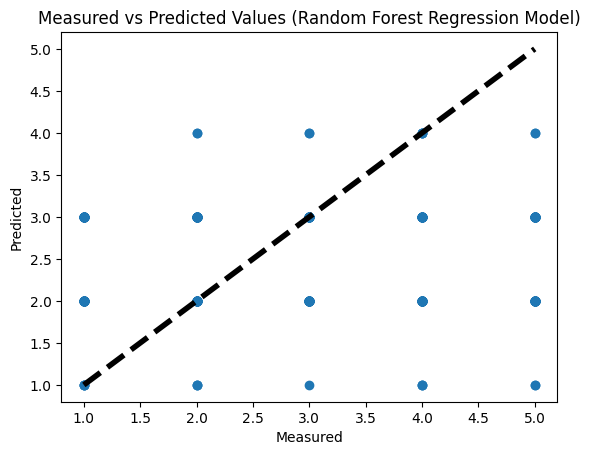

In [14]:
# Calculating Metrics
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:', r2_score(y_test, y_pred))

try:
    print('Mean Squared Logarithmic Error (MSLE):', mean_squared_log_error(y_test,y_pred))
except:
    print("Can't calculate MSLE because it's not defined for negative values")

# Creating plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Measured vs Predicted Values (Random Forest Regression Model)')
plt.show()

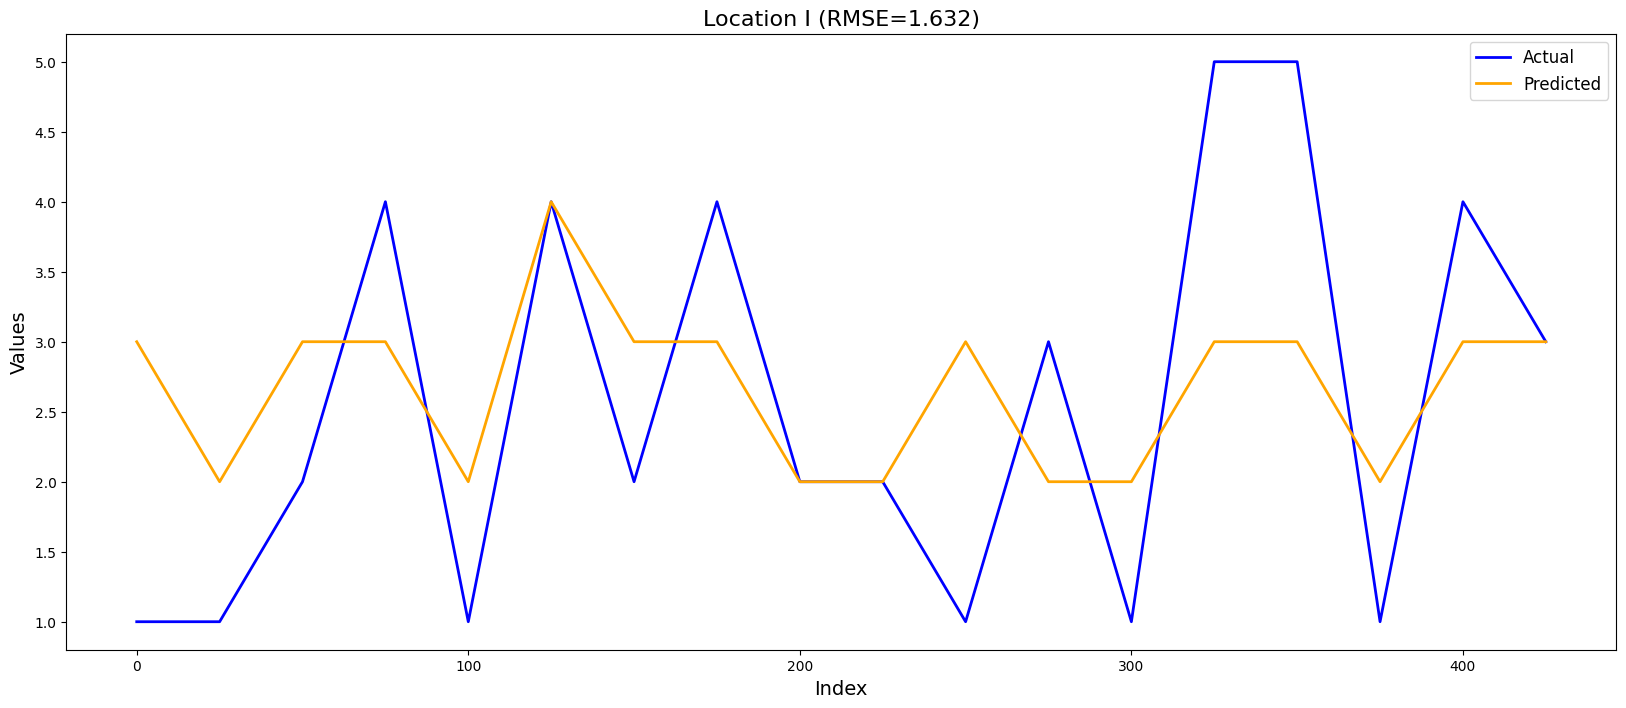

In [27]:

from sklearn.metrics import mean_squared_error



# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Sample points for a clearer plot (if necessary)
step = 25  # Adjust this step size depending on your dataset's size
index = np.arange(0, len(y_test), step)
sampled_y_test = y_test[::step]
sampled_y_pred = y_pred[::step]

# Creating the plot
plt.figure(figsize=(20, 8))  # Increased figure size for clarity
plt.plot(index, sampled_y_test, label='Actual', color='blue', linewidth=2)
plt.plot(index, sampled_y_pred, label='Predicted', color='orange', linewidth=2)
plt.title(f"Location I (RMSE={rmse:.3f})", fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)
plt.show()
